<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/OLA_CaseStudy_Mariya_DSMLJune2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OLA Driver Churn Prediction Using Ensemble Models

### **Objective**:
Based on the below attributes, OLA wants to find out if a drive would leave the company or not?  

*   Demographics (city, age, gender etc.)
*   Tenure information (joining date, Last Date)
*   Historical data regarding the performance of the driver (Quarterly rating, *   Monthly business acquired, grade, Income)

### **Import the Libraries**

In [9]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')


In [83]:
!pip install simple_colors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
from simple_colors import *

### **Load the Data**

In [12]:
data_df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')

### **Statistical Summary** 

#### Basic information about the Data

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


#### Shape of the Data

In [4]:
# Shape of the data
print("Given dataset contains {0} Rows and {1} Columns".format(data_df.shape[0], data_df.shape[1]))

Given dataset contains 19104 Rows and 14 Columns


#### Missing Values

Missing Values in the Given Data Set


,Count,Percentage
LastWorkingDate,17488,91.5
Age,61,0.3
Gender,52,0.3
Unnamed: 0,0,0.0
MMM-YY,0,0.0
Driver_ID,0,0.0
City,0,0.0
Education_Level,0,0.0
Income,0,0.0
Dateofjoining,0,0.0


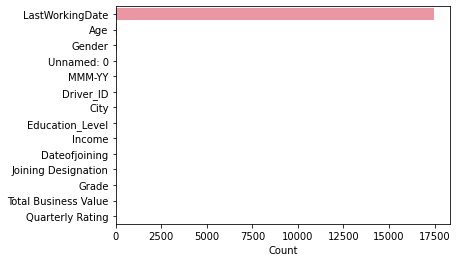

In [46]:
# Check for Missing Values
count = data_df.isna().sum()
missing_values_df = pd.DataFrame(count, columns=['Count'])
missing_values_df['Percentage'] = (data_df.isna().sum() / len(data_df) * 100).round(1)
missing_values_df.sort_values(by='Percentage', ascending=False, inplace=True)
print("Missing Values in the Given Data Set")
display(missing_values_df)
sns.barplot(y=missing_values_df.index, x='Count', data=missing_values_df)
# plt.xlim(0, 2000)

In [47]:
# Sparcity of Missing Values
data_df.isna().sum(axis=1).value_counts()

1    17395
0     1606
2      103
dtype: int64

In [54]:
import missingno as msng

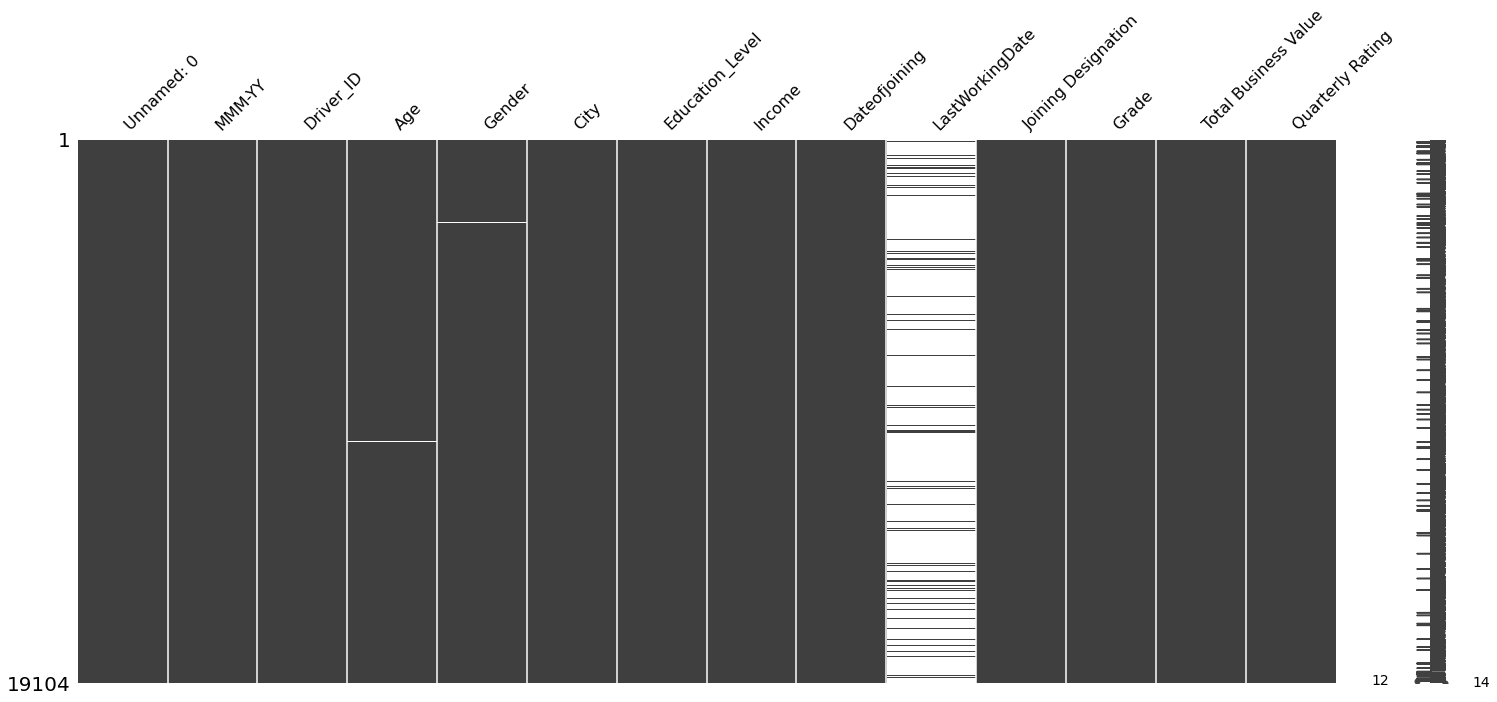

In [58]:
msng.matrix(data_df)

In [62]:
data_df.describe(include='all')

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104,19104.000000,19043.000000,19052.000000,19104,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000
unique,NaN,24,NaN,NaN,NaN,29,NaN,NaN,869,493,NaN,NaN,NaN,NaN
top,NaN,01/01/19,NaN,NaN,NaN,C20,NaN,NaN,23/07/15,29/07/20,NaN,NaN,NaN,NaN
freq,NaN,1022,NaN,NaN,NaN,1008,NaN,NaN,192,70,NaN,NaN,NaN,NaN
mean,9551.500000,NaN,1415.591133,34.668435,0.418749,NaN,1.021671,65652.025126,NaN,NaN,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,NaN,810.705321,6.257912,0.493367,NaN,0.800167,30914.515344,NaN,NaN,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,NaN,1.000000,21.000000,0.000000,NaN,0.000000,10747.000000,NaN,NaN,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,NaN,710.000000,30.000000,0.000000,NaN,0.000000,42383.000000,NaN,NaN,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,NaN,1417.000000,34.000000,0.000000,NaN,1.000000,60087.000000,NaN,NaN,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,NaN,2137.000000,39.000000,1.000000,NaN,2.000000,83969.000000,NaN,NaN,2.000000,3.000000,6.997000e+05,3.000000


### **Feature Engineering**

#### Drop the un-used/irrelevant column(s)

In [63]:
# Drop the Unnamed column 
data_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [64]:
data_df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [66]:
data_df.shape

(19104, 13)

In [79]:
data_df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

##### **Observation**: There are 2381 drivers and the whole dataset is around these 2381 drivers. For further analysis we have to aggregate the data based on unique driver id.

In [80]:
data_df['Gender'].replace({0.0:"Male", 1.0:"Female"}, inplace=True)

In [81]:
data_df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [89]:
# Value types and their unique counts of Categorical Variables
def display_unique_values(df):
  print("*** Unique Values count of Categorical Variables ***\n")
  for col in df.astype('object').columns:
    if len(df[col].value_counts())<10:
      print(blue(col, ['bold']))
      print(df[col].value_counts().to_string(),'\n')

In [90]:
display_unique_values(data_df)

*** Unique Values count of Categorical Variables ***

Gender
Male      11074
Female     7978 

Education_Level
1    6864
2    6327
0    5913 

Joining Designation
1    9831
2    5955
3    2847
4     341
5     130 

Grade
2    6627
1    5202
3    4826
4    2144
5     305 

Quarterly Rating
1    7679
2    5553
3    3895
4    1977 



In [91]:
# Take a working copy of the dataset
work_df = data_df.copy()

In [93]:
work_df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64